Code writer: [Christian Benitez](https://github.com/christianmbr).

In [154]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Preparing the data

In [155]:
# Loading the database.
path = './data_bases/mnist_train.csv'
db = pd.read_csv(path, header=None)

In [156]:
# Extracting and binarizing targets.
target = db.pop(0)
binarized_target = to_categorical(target, num_classes=10)

In [157]:
# All the unique targets of the data set.
np.sort(target.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [158]:
# The first five letters of the database.
db.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Reshaping all numbers of the data set to their original size.
images = db.values.reshape(-1, 28, 28)
images.shape

(60000, 28, 28)

In [191]:
# Function to print the first 25 images.
def print_letters(images, shape=(5,5), size=(10,10)):
  _, axe = plt.subplots(shape[0], shape[1], figsize=size)
  axe = axe.flatten()

  for i in range(shape[0]*shape[1]):
    axe[i].imshow(images[i], cmap='gray')
    axe[i].set_xticks([])
    axe[i].set_yticks([])

In [162]:
# Function for applying a threshold to images.
def binarize_numpy_array(images, thresh = 1):
  img = images.copy()
  for i, image in enumerate(img):
    image_scaled = cv2.convertScaleAbs(image)
    _, img[i] = cv2.threshold(image_scaled, thresh, 255, cv2.THRESH_BINARY)
  return img

In [185]:
ready_to_train = binarize_numpy_array(images, thresh = 1)

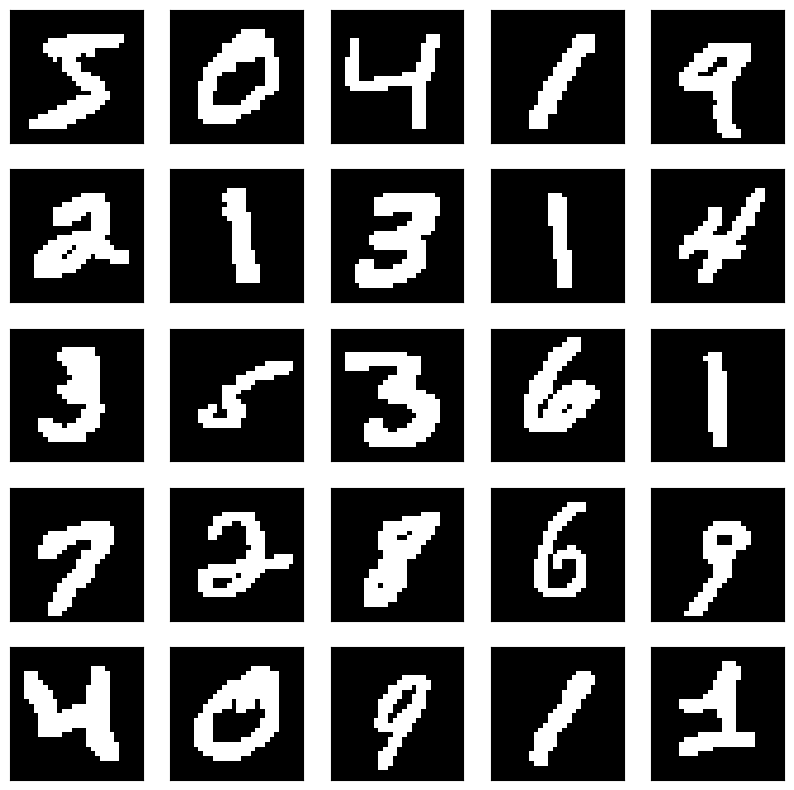

In [186]:
# Binarized images.
print_letters(ready_to_train)

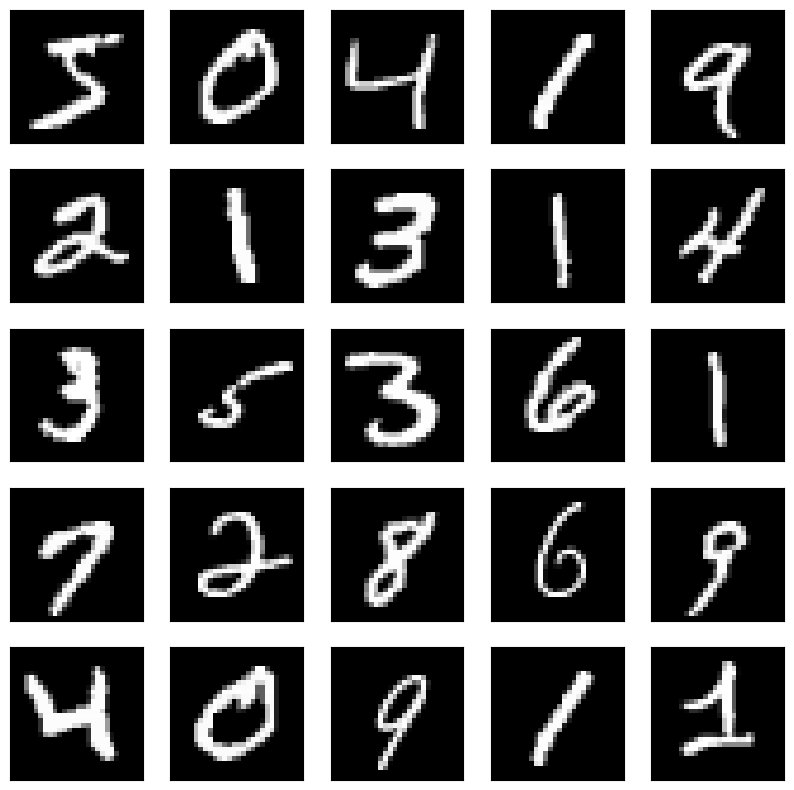

In [165]:
# Original images.
print_letters(images)

In [166]:
# Flattening all images and nornalize.
ready_to_train = ready_to_train.reshape([-1, 28*28])
ready_to_train = ready_to_train / 255

# Creating the artificial neuronal network. 

In [167]:
# Artificial neuronal network (ann).
# Creating ann.
ann = Sequential()
ann.add(Dense(200, input_shape = (28*28,), activation = 'tanh'))
ann.add(Dense(150, activation = 'tanh'))
ann.add(Dense(10, activation = 'softmax'))

# Configure ann.
ann.compile(loss = 'mae', metrics = ['accuracy'])

# optimizer = 'adam'
# mean absolute error (mae). Se utiliza para medir la diferencia entre las predicciones del modelo y los valores reales de la variable objetivo en el conjunto de datos de entrenamiento.
# Optimizer adam. Ajustar los parámetros del modelo de manera eficiente y efectiva para minimizar la función de pérdida.
# Softmax. utilizada en la última capa de una red neuronal para problemas de clasificación multiclase.

A neural network with 784 inputs, a layer of 200 neurons, a layer of 150 neurons and an output of 10 neurons.

Training neuronal network

In [178]:
# The size of all prepared images.
# 60000 images and 784 features(pixels).
ready_to_train.shape

(60000, 784)

In [168]:
# Start training.
history = ann.fit(ready_to_train, binarized_target, epochs = 100, batch_size = 100 , verbose = 1, validation_split = 0.1)

Epoch 1/100


2023-05-13 22:30:55.999604: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


540/540 [==============================] - 4s 6ms/step - loss: 0.0356 - accuracy: 0.8511 - val_loss: 0.0166 - val_accuracy: 0.9268
Epoch 2/100
540/540 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9257 - val_loss: 0.0124 - val_accuracy: 0.9470
Epoch 3/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0132 - accuracy: 0.9417 - val_loss: 0.0099 - val_accuracy: 0.9560
Epoch 4/100
540/540 [==============================] - 3s 6ms/step - loss: 0.0109 - accuracy: 0.9519 - val_loss: 0.0095 - val_accuracy: 0.9567
Epoch 5/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0094 - accuracy: 0.9583 - val_loss: 0.0080 - val_accuracy: 0.9637
Epoch 6/100
540/540 [==============================] - 2s 5ms/step - loss: 0.0082 - accuracy: 0.9634 - val_loss: 0.0073 - val_accuracy: 0.9663
Epoch 7/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0073 - accuracy: 0.9681 - val_loss: 0.0075 - val_accuracy: 0.9653
Epoch 8/100

Nota: The error rate of the trained model is 0.0015 or 0.15%.

Text(0.5, 0, 'epochs')

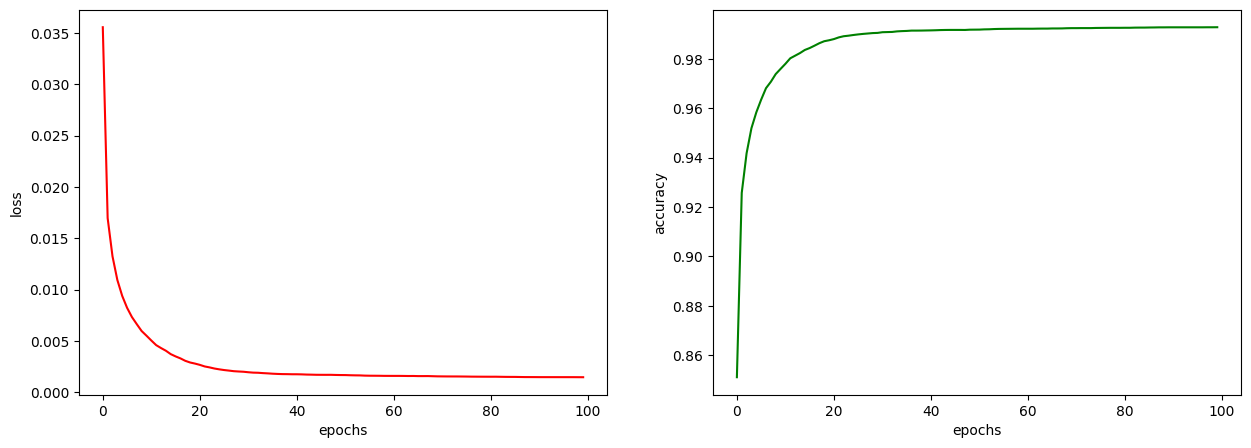

In [169]:
# Loss, accuracy metrics.
axe = plt.subplots(1, 2, figsize=(15, 5))[1]
axe[0].plot(history.history['loss'], c='r')
axe[0].set_ylabel('loss')
axe[0].set_xlabel('epochs')

axe[1].plot(history.history['accuracy'], c='g')
axe[1].set_ylabel('accuracy')
axe[1].set_xlabel('epochs')

# Preparing data set of my handwritten letters.

In [170]:
my_numbers = []
for i in range(10):
    image_path = f'./img/my_numbers/num{i}.png'
    image = cv2.imread(image_path, 0)
    # To invert pixels.
    image = cv2.bitwise_not(image)
    # Resize.
    image = cv2.resize(image, (28, 28))
    # Binaring.
    image = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY)[1]
    # Flatten.
    image = image.reshape([-1, 28*28])
    # Normalizing.
    image = image / 255
    my_numbers.append(image[0])
my_numbers = np.array(my_numbers)

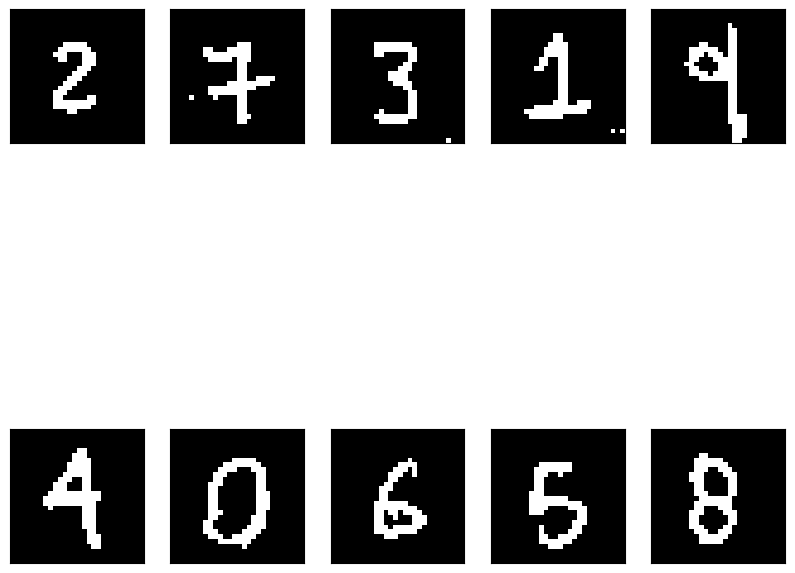

In [194]:
# Ploting all my numbers.
print_letters(my_numbers.reshape([-1, 28,28]), shape=(2, 5))

# Testing with my numbers.

In [171]:
# Here we have all my dataset.
# Shuffeling the data.
np.random.shuffle(my_numbers)

In [195]:
my_numbers.shape

(10, 784)

In [172]:
prediction = ann.predict(my_numbers)

1/1 [==============================] - 0s 79ms/step


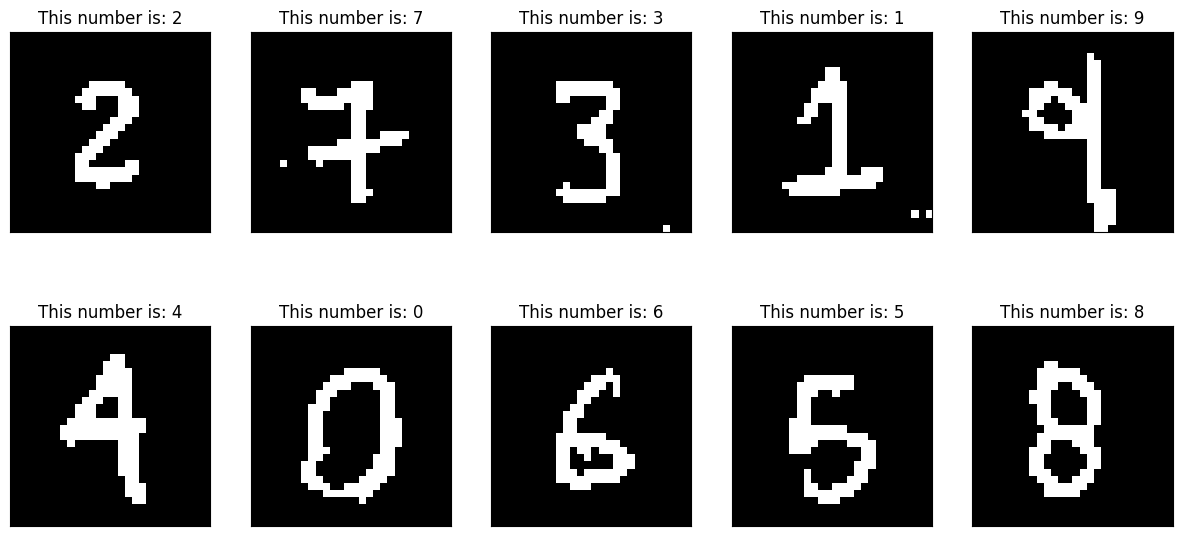

In [196]:
# Ploting my numbers next to their prediction.
fig, axe = plt.subplots(2, 5, figsize=(15, 7))
axe = axe.flatten()

for i in range(10):
    the_number_is = np.argmax(prediction[i])
    axe[i].imshow(my_numbers[i].reshape([28,28]), cmap='gray')
    axe[i].set_xticks([])
    axe[i].set_yticks([])
    axe[i].set_title(f'This number is: {the_number_is}')